# CNN Model Test

### Imports

In [1]:
from __future__ import print_function # Use a function definition from future version (say 3.x from 2.7 interpreter)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import time

import cntk as C

%matplotlib inline

from cntk.io import UserMinibatchSource, StreamInformation, MinibatchData, Value
from PIL import Image



# Ensure we always get the same amount of randomness
np.random.seed(0)
from skimage import io
from skimage.color import rgb2gray
from skimage.viewer import ImageViewer
import matplotlib.pyplot as plt
from scipy import misc
import cv2
import os
import numpy as np

print('libraries imported!!')

C:\ProgramData\Anaconda3\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


libraries imported!!


### Load data

In [2]:
print(os.getcwd())

train_img_dir = os.getcwd() + '/Capstone data/train/'
test_img_dir = os.getcwd() + '/Capstone data/test/'

#spectrogram of current 
train_img_names_c = [x for x in os.listdir(train_img_dir) if x.endswith('_c.png')]

#spectrogram of voltage
train_img_names_v = [x for x in os.listdir(train_img_dir) if x.endswith('_v.png')]

#spectrogram of current 
test_img_names_c = [x for x in os.listdir(test_img_dir) if x.endswith('_c.png')]

#spectrogram of voltage
test_img_names_v = [x for x in os.listdir(test_img_dir) if x.endswith('_v.png')]


print(len(train_img_names_c))
print(len(train_img_names_v))

print(len(test_img_names_c))
print(len(test_img_names_v))
print(len(train_img_names_c))

all_train_images = np.ones((len(train_img_names_c), 128, 118)) #if as_grey=True
all_test_images = np.ones((len(test_img_names_c), 128, 118)) #if as_grey=True

C:\Users\bauer\OneDrive para la Empresa\Microsoft Capstone IA
988
988
659
659
988


In [3]:
i = 0
for im in train_img_names_c:

    # Load an color image in grayscale
    my_image = cv2.imread(train_img_dir + '/' + im,0)


    all_train_images[i] = my_image
    i = i + 1

    
i = 0
for im in test_img_names_c:
    #print(im)
    my_image = cv2.imread(test_img_dir + '/' + im,0)


    all_test_images[i] = my_image
    i = i + 1    


print("all_train_images.shape {0}".format(all_train_images.shape))
print("all_test_images.shape {0}".format(all_test_images.shape))


all_train_images.shape (988, 128, 118)
all_test_images.shape (659, 128, 118)


[[ 30.  30.  30. ...  30.  30.  30.]
 [ 30.  30.  30. ...  30.  30.  30.]
 [ 30.  30.  30. ...  30.  30.  30.]
 ...
 [ 77.  73.  71. ... 194. 195. 200.]
 [ 78.  81.  82. ... 212. 212. 205.]
 [ 69.  63.  62. ... 179. 181. 185.]]


(-0.5, 117.5, 127.5, -0.5)

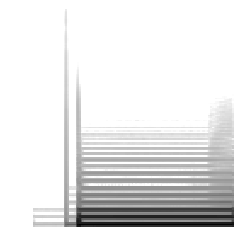

In [4]:

# look at the image
#plt.imshow(my_image)



sample_number = 12
print(all_train_images[sample_number])
plt.imshow(all_train_images[sample_number], cmap="gray_r")
plt.axis('off')

In [5]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:

print("\n**************************")
n_samples = len(all_train_images)

print("all_train_images.shape {0}".format(all_train_images.shape))
data_train = all_train_images.reshape((n_samples, 15104)) #988, 15104, 4

print("data_train shape {0}".format(data_train.shape))
print(data_train[:10])

print("**************************\n")


print("\n**************************")
n_samples = len(all_test_images)

print("all_test_images.shape {0}".format(all_test_images.shape))
data_test = all_test_images.reshape((n_samples, 15104)) #988, 15104, 4

print("data_test shape {0}".format(data_test.shape))
print(data_test[:10])

print("**************************\n")


**************************
all_train_images.shape (988, 128, 118)
data_train shape (988, 15104)
[[ 38.  47.  51. ... 179. 184. 197.]
 [ 30.  30.  30. ... 177. 183. 196.]
 [ 62.  61.  64. ... 180. 187. 204.]
 ...
 [ 30.  30.  30. ... 180. 186. 200.]
 [ 67.  68.  66. ... 152. 159. 179.]
 [ 74.  61.  46. ... 153. 165. 159.]]
**************************


**************************
all_test_images.shape (659, 128, 118)
data_test shape (659, 15104)
[[ 84.  81.  77. ... 179. 179. 172.]
 [ 30.  30.  30. ... 180. 181. 180.]
 [ 30.  30.  30. ... 152. 153. 148.]
 ...
 [ 56.  61.  62. ... 180. 180. 174.]
 [ 30.  30.  30. ... 179. 188. 205.]
 [ 70.  71.  69. ... 152. 154. 162.]]
**************************



In [6]:
from numpy import genfromtxt


train_labels_dir = os.getcwd() + '/'

train_labels = genfromtxt(train_labels_dir + 'train_labels.csv', delimiter=',', skip_header=1)

print(len(train_labels))
print(train_labels.shape)

988
(988, 2)


### Split the data and prepare the text files

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data_train, train_labels, test_size = 0.3, random_state = 54)

print('train_labels shape is :', train_labels.shape, '\n')
print('x_train shape is: ', x_train.shape, '\n',
      'y_train shape is: ', y_train.shape, '\n')

print('x_test shape is: ', x_test.shape, '\n', 
      'y_test shape is: ', y_test.shape)

train_labels shape is : (988, 2) 

x_train shape is:  (691, 15104) 
 y_train shape is:  (691, 2) 

x_test shape is:  (297, 15104) 
 y_test shape is:  (297, 2)


In [8]:
 def next_minibatch(self, num_samples, number_of_workers=1, worker_rank=0, device=None):
        # Note that in this example we do not yet make use of number_of_workers or
        # worker_rank, which will limit the minibatch source to single GPU / single node
        # scenarios.

        features = []
        labels = []

        sweep_end = False

        sample_count = 0
        
        while (sample_count < num_samples):
            if self.next_seq_idx == len(self.datafiles):
                sweep_end = True
                self.next_seq_idx = 0
            
            img = Image.open(self.datafiles[self.next_seq_idx][0])
            
            # Convert Image to numpy array. 
            f_data = np.array(img)
          
             
            if (len(f_data.shape) == 2):
                # Image has shape height x width. We need to transpose it to width x height
                f_data = f_data.transpose(1, 0)    
                
                # This extra step is required to create data in the right shape that is acceptable during the training process.
                # Ignoring this step will result in an error. Try commenting out the line below and observe the error.                
                f_data = f_data[None, :]
            elif (len(f_data.shape) == 3):
                # Image has shape height x width x channel. We need to transpose it to channel x width x height            
                f_data = f_data.transpose(2, 1, 0)
            else:
                print("Unexpected image type")
                return -1
                        
            #Assign the one-hot encoded label to l_data
            l_data = self.label_onehot[self.datafiles[self.next_seq_idx][1]]
            
            features.append(f_data)
            labels.append(l_data)
                        
            sample_count = sample_count + 1
            self.next_seq_idx = self.next_seq_idx + 1
            
        num_seq = len(features)
                               
        f_data = Value(batch=np.asarray(features, dtype=np.float32))
        l_data = Value(batch=np.asarray(labels, dtype=np.float32))    
        
        result = {            
                cx: MinibatchData(f_data, num_seq, sample_count, sweep_end),
                cy: MinibatchData(l_data, num_seq, sample_count, sweep_end)
                }
   

        return result        

In [9]:
# Save the data files into a format compatible with CNTK text reader
def savetxt(filename, data, hasLabels=True, labels=0):
    dir = os.path.dirname(filename)

    if not os.path.exists(dir):
        os.makedirs(dir)
    
    print("Saving", filename )
    with open(filename, 'w') as f:
        print("opened....")
        labels_ohe = list(map(' '.join, np.eye(11, dtype=np.uint).astype(str))) #for one hot encoding
        index = 0
        for row in data:            
            row_str = row.astype(str)
            if hasLabels:                               
                label_str = labels_ohe[int(labels[index])]               
            
            feature_str = ' '.join(row_str)
            
            if hasLabels:
                f.write('|labels {} |features {}\n'.format(label_str, feature_str))
            else:
                f.write('|features {}\n'.format(feature_str))
            
            index = index + 1

In [10]:
train_labels_GT = y_train[:,1] #Get Ground truth
test_labels_GT = y_test[:,1]

print ('Writing train text file...')

data_dir = os.path.join(os.getcwd(), "data/Out")


savetxt(os.path.join(data_dir, "train.txt"), x_train, True, train_labels_GT)
savetxt(os.path.join(data_dir, "test.txt"), x_test, True, test_labels_GT)


print("Done")

Writing train text file...
Saving C:\Users\bauer\OneDrive para la Empresa\Microsoft Capstone IA\data/Out\train.txt
opened....
Saving C:\Users\bauer\OneDrive para la Empresa\Microsoft Capstone IA\data/Out\test.txt
opened....
Done


### Create Reader Deserializer

In [34]:
# Read a CTF formatted text (as mentioned above) using the CTF deserializer from a file
def create_reader(path, is_training, input_dim = 128*118, num_label_classes = 11):
    
    labelStream = C.io.StreamDef(field='labels', shape=num_label_classes, is_sparse=False)
    featureStream = C.io.StreamDef(field='features', shape=input_dim, is_sparse=False)
    
    deserailizer = C.io.CTFDeserializer(path, C.io.StreamDefs(labels = labelStream, features = featureStream))
            
    return C.io.MinibatchSource(deserailizer,
       randomize = is_training, max_sweeps = C.io.INFINITELY_REPEAT if is_training else 1)

### Prepare the CNN Model

In [12]:
from __future__ import print_function # Use a function definition from future version (say 3.x from 2.7 interpreter)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import time

import cntk as C

%matplotlib inline


# Ensure we always get the same amount of randomness
np.random.seed(0)
C.cntk_py.set_fixed_random_seed(1)
C.cntk_py.force_deterministic_algorithms()

# Define the data dimensions
input_dim_model = (1, 128, 118)    # images are 28 x 28 with 1 channel of color (gray)
input_dim = 128*118                # used by readers to treat input data as a vector
num_output_classes = 11

### Define input variables

In [13]:
x = C.input_variable(input_dim_model)
y = C.input_variable(num_output_classes)

In [14]:
# function to build model

def create_model(features):
    with C.layers.default_options(init=C.glorot_uniform(), activation=C.relu):
            h = features
            h = C.layers.Convolution2D(filter_shape=(5,5), 
                                       num_filters=8, 
                                       strides=(2,2), 
                                       pad=True, name='first_conv')(h)
            h = C.layers.MaxPooling(filter_shape=(2,2), 
                                    strides=(2,2), name="first_max")(h)            
            h = C.layers.Convolution2D(filter_shape=(5,5), 
                                       num_filters=16, 
                                       strides=(2,2), 
                                       pad=True, name='second_conv')(h)
            h = C.layers.MaxPooling(filter_shape=(3,3), 
                                    strides=(3,3), name="second_max")(h)            
            r = C.layers.Dense(num_output_classes, activation=None, name='classify')(h)
            
            return r
        
z = create_model(x)
# Print the output shapes / parameters of different components
print("Output Shape of the first convolution layer:", z.first_conv.shape)
print("Bias value of the last dense layer:", z.classify.b.value)

Output Shape of the first convolution layer: (8, 64, 59)
Bias value of the last dense layer: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
# Number of parameters in the network
C.logging.log_number_of_parameters(z)

Training 7835 parameters in 6 parameter tensors.


In [24]:
def create_criterion_function(model, labels):
    loss = C.cross_entropy_with_softmax(model, labels)
    errs = C.classification_error(model, labels)
    return loss, errs # (model, labels) -> (loss, error metric)

# Define a utility function to compute the moving average sum.
# A more efficient implementation is possible with np.cumsum() function
def moving_average(a, w=5):
    if len(a) < w:
        return a[:]    # Need to send a copy of the array
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]


# Defines a utility that prints the training progress
def print_training_progress(trainer, mb, frequency, verbose=1):
    training_loss = "NA"
    eval_error = "NA"

    if mb%frequency == 0:
        training_loss = trainer.previous_minibatch_loss_average
        eval_error = trainer.previous_minibatch_evaluation_average
        if verbose: 
            print ("Minibatch: {0}, Loss: {1:.4f}, Error: {2:.2f}%".format(mb, training_loss, eval_error*100))
        
    return mb, training_loss, eval_error

### Train_test function

In [25]:
def img_train(train_reader, model_func, train_minibatch_size = 35, num_samples_per_sweep = 15000, 
              num_sweeps_to_train_with = 10, learning_rate = 0.1, training_progress_output_freq = 500):
    
    global plotdata
    
    print("Training minibatch size = " + str(train_minibatch_size))
    print("Number of samples per sweep = " + str(num_samples_per_sweep))
    print("Number of sweeps to train with = " + str(num_sweeps_to_train_with))
    print("Learning rate = " + str(learning_rate))
    
    
    # Instantiate the model function; x is the input (feature) variable 
    # We will scale the input image pixels within 0-1 range by dividing all input value by 255.
    model = model_func(cx/255)
    
    # Instantiate the loss and error function
    loss, label_error = create_criterion_function(model, cy)
    
    # Instantiate the trainer object to drive the model training
    lr_schedule = C.learning_rate_schedule(learning_rate, C.UnitType.minibatch)
    learner = C.sgd(cz.parameters, lr_schedule)
    trainer = C.Trainer(cz, (loss, label_error), [learner])
    
    # Initialize the parameters for the trainer
    num_minibatches_to_train = (num_samples_per_sweep * num_sweeps_to_train_with) / train_minibatch_size
    
    import time
    # Start a timer
    start = time.time()
    
    print("Number of mini batches to train = " + str(num_minibatches_to_train))
    
    for i in range(0, int(num_minibatches_to_train)):
        # Read a mini batch from the training dataset
        data=train_reader.next_minibatch(train_minibatch_size)
        
        trainer.train_minibatch(data)
        mb, training_loss, eval_error, time_since_start = print_training_progress(trainer, i, 
                                                                                  training_progress_output_freq, start, 
                                                                                  verbose=1)
        
        if ((i % training_progress_output_freq) == 0):
            plotdata["minibatch_num"].append(mb)
            plotdata["loss"].append(training_loss)
            plotdata["error"].append(eval_error)
            plotdata["time"].append(time_since_start)
     
    # Print training time
    print("Training took {:.1f} sec".format(time.time() - start))
    
    return trainer

In [26]:
def img_test(trainer, test_reader, num_test_samples = 3000, test_minibatch_size = 50, print_frequency = 500):
    
    # Test data for trained model       
    num_minibatches_to_test = num_test_samples // test_minibatch_size

    print("Number of minibatches to test = " + str(num_minibatches_to_test))
    test_result = 0.0   

    for i in range(0, num_minibatches_to_test):               
        # We are loading test data in batches specified by test_minibatch_size
        data = test_reader.next_minibatch(test_minibatch_size)
            
        eval_error = trainer.test_minibatch(data)
        test_result = test_result + eval_error
        
        if ((i % print_frequency) == 0):
            print("Testing minibatch " + str(i) + " Eval error = " + str(eval_error))

    # Average of evaluation errors of all test minibatches
    print("Average test error: {0:.2f}%".format(test_result * 100 / num_minibatches_to_test))    

In [27]:

def train_test(train_reader, test_reader, model_func, num_sweeps_to_train_with=10):
    
    # Instantiate the model function; x is the input (feature) variable 
    # We will scale the input image pixels within 0-1 range by dividing all input value by 255.
    model = model_func(x/255)
    
    # Instantiate the loss and error function
    loss, label_error = create_criterion_function(model, y)
    
    # Instantiate the trainer object to drive the model training
    learning_rate = 0.2
    lr_schedule = C.learning_rate_schedule(learning_rate, C.UnitType.minibatch)
    learner = C.sgd(z.parameters, lr_schedule)
    trainer = C.Trainer(z, (loss, label_error), [learner])
    
    # Initialize the parameters for the trainer
    minibatch_size = 1
    num_samples_per_sweep = 691
    num_minibatches_to_train = (num_samples_per_sweep * num_sweeps_to_train_with) / minibatch_size
    
    # Map the data streams to the input and labels.
    input_map={
        y  : train_reader.streams.labels,
        x  : train_reader.streams.features
    } 
    
    # Uncomment below for more detailed logging
    training_progress_output_freq = 10
     
    # Start a timer
    start = time.time()

    for i in range(0, int(num_minibatches_to_train)):
        # Read a mini batch from the training data file
        data=train_reader.next_minibatch(minibatch_size, input_map=input_map) 
        trainer.train_minibatch(data)
        print_training_progress(trainer, i, training_progress_output_freq, verbose=1)
     
    # Print training time
    print("Training took {:.1f} sec".format(time.time() - start))
    
    # Test the model
    test_input_map = {
        y  : test_reader.streams.labels,
        x  : test_reader.streams.features
    }

    # Test data for trained model
    test_minibatch_size = 1
    num_samples = 297
    num_minibatches_to_test = num_samples // test_minibatch_size

    test_result = 0.0   

    for i in range(num_minibatches_to_test):
    
        # We are loading test data in batches specified by test_minibatch_size
        # Each data point in the minibatch is a MNIST digit image of 784 dimensions 
        # with one pixel per dimension that we will encode / decode with the 
        # trained model.
        data = test_reader.next_minibatch(test_minibatch_size, input_map=test_input_map)
        eval_error = trainer.test_minibatch(data)
        test_result = test_result + eval_error

    # Average of evaluation errors of all test minibatches
    print("Average test error: {0:.2f}%".format(test_result*100 / num_minibatches_to_test))

In [28]:
train_file = 'data/out/train.txt'
test_file = 'data/out/test.txt'

In [29]:
def train_test(train_file, test_file, train_minibatch_size = 35, num_samples_per_sweep = 988, 
                   num_sweeps_to_train_with = 10, learning_rate = 0.1,):
    global z
    
    z = create_model(x)
    reader_train = create_reader(train_file, input_dim)
    reader_test = create_reader(test_file, input_dim)
    train_test(reader_train, reader_test, z)

In [30]:
def plotCharts():

    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["minibatch_num"], plotdata["loss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')

    plt.show()

    plt.subplot(212)
    plt.plot(plotdata["minibatch_num"], plotdata["error"], 'r--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Label Prediction Error')
    plt.title('Minibatch run vs. Label Prediction Error')
    plt.show()

### Prepare for model evaluation

In [31]:
from cntk.ops.functions import load_model

def loadAndEvalModel(modelFileName, eval_file, eval_minibatch_size = 25):
    global z
    z = load_model(modelFileName)
    
    out = C.softmax(cz)
    
    # Read the data for evaluation    
    reader_eval = create_reader(eval_file, input_dim, num_output_classes)

    data = reader_eval.next_minibatch(eval_minibatch_size)
    predicted_label_prob = []
    
    img_label = 1
    img_data = 1
    

    for d in data:
        if (len(data[d].shape) == 2):
            img_label = data[d].as_sequences()
        else:
            img_data = data[d].as_sequences()
            
    # Note the division by 255. This is to match how the data was prepared during training.
    # Skipping the division will give incorrect results  
    predicted_label_prob = [out.eval(img_data[i] / 255) for i in range(0, len(img_data))]
       
    # Find the index with the maximum value for both predicted as well as the ground truth
    pred = [np.argmax(predicted_label_prob[i]) for i in range(len(predicted_label_prob))]
    gtlabel = [np.argmax(img_label[i]) for i in range(len(img_label))]
    
    num_errors = 0
    for i in range(0, eval_minibatch_size):
        if (pred[i] != gtlabel[i]):
            num_errors = num_errors + 1
    
    #print("Label    :", gtlabel)
    #print("Predicted:", pred)
    print("Number of errors: " + str(num_errors))
    print("Error % = " + str(100 * num_errors / eval_minibatch_size))

In [35]:
# Create the model
z = create_model(x)

# Number of parameters in the network
C.logging.log_number_of_parameters(z)

train_test(train_file, test_file)

# Save the model to a file
z.save("./CNN-capstone-img.dnn")

plotCharts()

Training 7835 parameters in 6 parameter tensors.


TypeError: in method 'ctf_deserializer', argument 1 of type 'std::wstring const &'

### Modify the save_text function to avoid malformed input file error

In [67]:
# Save the data files into a format compatible with CNTK text reader
def savetxt(filename, data, hasLabels=True, labels=0):
    dir = os.path.dirname(filename)

    if not os.path.exists(dir):
        os.makedirs(dir)
    
    print("Saving", filename )
    with open(filename, 'w') as f:
        print("opened....")
        labels_ohe = list(map(' '.join, np.eye(11, dtype=np.uint).astype(str))) #for one hot encoding
        index = 0
        for row in data:            
            row_str = row.astype(str)
            if hasLabels:                               
                label_str = labels_ohe[int(labels[index])]               
            
            feature_str = ' '.join(row_str)
            
            if hasLabels:
                f.write('|labels {} |features {}\n'.format(label_str, feature_str))
            else:
                f.write('|labels {} |features {}\n'.format(labels_ohe[1], feature_str))

            
            index = index + 1

### Create the model evaluation file

In [68]:
print ('Writing train text file...')

data_dir = os.path.join(os.getcwd(), "data/Out")


savetxt(os.path.join(data_dir, "test_eval.txt"), data_test, False)


print("Done")

Writing train text file...
Saving C:\Users\bauer\OneDrive para la Empresa\Microsoft Capstone IA\data/Out\test_eval.txt
opened....
Done


In [69]:
# Read the data for evaluation
eval_file = 'C:/Users/bauer/OneDrive para la Empresa/Microsoft Capstone IA/data/Out/test_eval.txt'
reader_eval=create_reader(eval_file, False, input_dim, num_output_classes)

eval_minibatch_size = 25
eval_input_map = {x: reader_eval.streams.features, y:reader_eval.streams.labels} 

data = reader_eval.next_minibatch(eval_minibatch_size, input_map=eval_input_map)

img_label = data[y].asarray()
img_data = data[x].asarray()

### Make Predictions

In [70]:
# reshape img_data to: M x 1 x 128 x 118 to be compatible with model
img_data = np.reshape(img_data, (eval_minibatch_size, 1, 128, 118))

predicted_label_prob = [out.eval(img_data[i]) for i in range(len(img_data))]


# Find the index with the maximum value for both predicted as well as the ground truth
pred = [np.argmax(predicted_label_prob[i]) for i in range(len(predicted_label_prob))]
gtlabel = [np.argmax(img_label[i]) for i in range(len(img_label))]


print("Label    :", gtlabel[:25])
print("Predicted:", pred)

Label    : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Predicted: [2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


# Optionally modify model

In [ ]:
'''from cntk.layers.layers import AveragePooling

def create_model(features):
    with C.layers.default_options(init = C.glorot_uniform(), activation = C.relu):
            h = features
            
            h = C.layers.Convolution2D(filter_shape=(5,5), 
                                       num_filters=8, 
                                       strides=(1,1), 
                                       pad=True, name='first_conv')(h)
            
            p =  AveragePooling((3,3), strides=1)
            
            ph = p(h)
            
            h = C.layers.Convolution2D(filter_shape=(5,5), 
                                       num_filters=16, 
                                       strides=(1,1), 
                                       pad=True, name='second_conv')(h)
            
            p =  AveragePooling((3,3), strides=1)
            
            ph = p(h)
            
            r = C.layers.Dense(num_output_classes, activation = None, name='classify')(h)
            return r'''

### Optionally train the model on the whole data

In [ ]:
'''# Save the data files into a format compatible with CNTK text reader
def savetxt(filename, data, hasLabels=True, labels=0):
    dir = os.path.dirname(filename)

    if not os.path.exists(dir):
        os.makedirs(dir)
    
    print("Saving", filename )
    with open(filename, 'w') as f:
        print("opened....")
        labels_ohe = list(map(' '.join, np.eye(11, dtype=np.uint).astype(str))) #for one hot encoding
        index = 0
        for row in data:            
            row_str = row.astype(str)
            if hasLabels:                               
                label_str = labels_ohe[int(labels[index])]               
            
            feature_str = ' '.join(row_str)
            
            if hasLabels:
                f.write('|labels {} |features {}\n'.format(label_str, feature_str))
            else:
                f.write('|labels {} |features {}\n'.format(labels_ohe[1], feature_str))

            
            index = index + 1



train_labels_GT = train_labels[:,1] #Get Ground truth


print ('Writing train text file...')

data_dir = os.path.join(os.getcwd(), "data/Out")


savetxt(os.path.join(data_dir, "train.txt"), data_train, True, train_labels_GT)
savetxt(os.path.join(data_dir, "test.txt"), data_test, False)


print("Done")

do_train_test()'''

### Optionally make predictions again from the new model

In [ ]:
'''# reshape img_data to: M x 1 x 128 x 118 to be compatible with model
img_data = np.reshape(img_data, (eval_minibatch_size, 1, 128, 118))

predicted_label_prob = [out.eval(img_data[i]) for i in range(len(img_data))]


# Find the index with the maximum value for both predicted as well as the ground truth
pred = [np.argmax(predicted_label_prob[i]) for i in range(len(predicted_label_prob))]
gtlabel = [np.argmax(img_label[i]) for i in range(len(img_label))]


print("Label    :", gtlabel[:25])
print("Predicted:", pred)'''

### Save predictions

In [ ]:
import pandas as pd
id_labels = pd.read_csv('test_labels.csv')
predictions = pd.DataFrame(data = pred, columns = ['appliance'])
predictions['id'] = id_labels['names']
predictions = predictions[['id', 'appliance']]


#SAVE CSV
predictions.to_csv('Caps_Preds.csv', index = None)